<a href="https://colab.research.google.com/github/TemrinaDarya/turbines-2022/blob/gas_turbines_hw2/gas_turbines_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

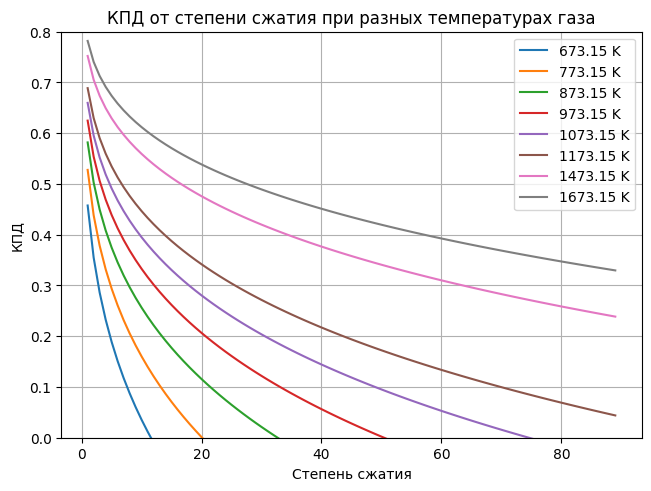

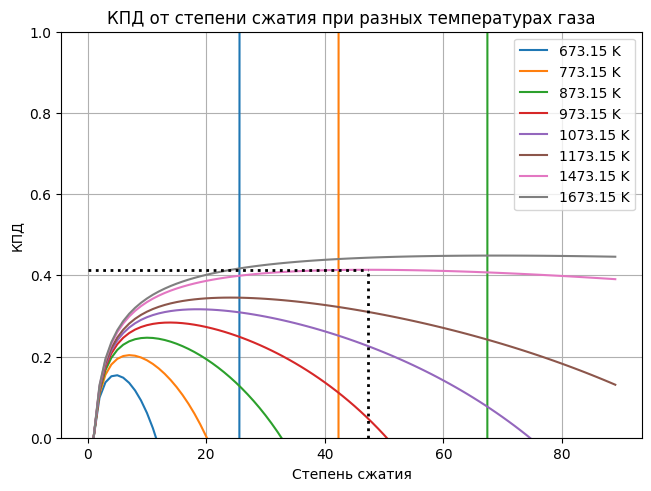

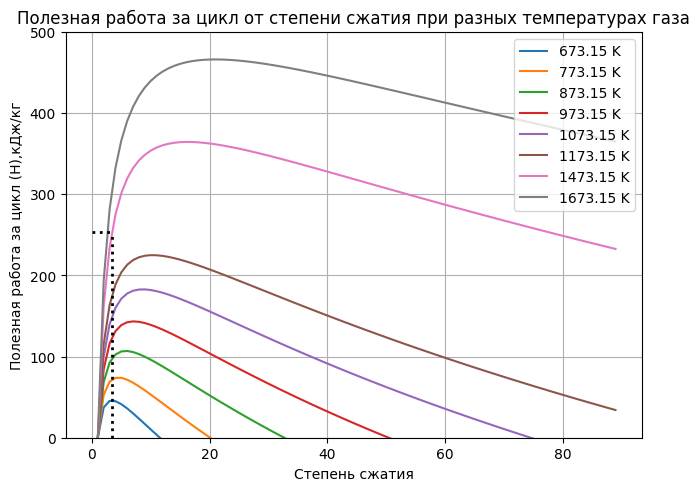

In [5]:
import matplotlib.pyplot as plt
import numpy as np
to_kelvin = lambda x: x + 273.15

turbine_eff = 0.88
compressor_eff = 0.85
combustor_eff = 1
m = 0.25
T_a = to_kelvin(0)
T_c = to_kelvin(400),to_kelvin(500),to_kelvin(600),to_kelvin(700),to_kelvin(800),to_kelvin(900),to_kelvin(1200),to_kelvin(1400)
Cp_air = 1005
Cp_gas = 1225
Cp = (Cp_air + Cp_gas) / 2
eps = list(range(1,90,1))

def __phi(eps,m,T_c, T_a):
    tau = T_c / T_a
    phi = 1 - ((eps ** m) / tau)
    return phi

def thermal_efficiency(m,eps):
    thermal_efficiency = 1 - eps ** (-m)
    return thermal_efficiency

def work_coeff1(eps, m, T_c, T_a, turbine_eff, compressor_eff):
    H_t = Cp * T_c * (1 - eps ** (-m)) * turbine_eff
    H_k = Cp * T_a * ((eps ** m) - 1) / compressor_eff
    work_coeff1 = (H_t - H_k) / 1000
    return work_coeff1  

def work_coeff2(eps, m, T_c, T_a, turbine_eff, compressor_eff):
    tau = T_c / T_a
    num_1 = tau * turbine_eff * (1 - eps ** (-m))
    num_2 = ((eps ** m) - 1) / compressor_eff
    denum = tau - 1 - (eps ** m - 1) / compressor_eff
    efficiency = (num_1 - num_2) / denum
    num = eps ** m
    denum = tau * turbine_eff * compressor_eff
    work_coeff2 = 1 - num/denum
    return efficiency, work_coeff2

kpd_therm = []
for value in eps:
    kpd_therm.append(thermal_efficiency(value, m))
 
phi = dict({})
for value in T_c:
    phi[value] = []
    for valueps in eps:
        phi[value].append(__phi(valueps, m, value, T_a))

efficiency = dict({})
work_coeff = dict({})
for value in T_c:
    efficiency[value] = []
    work_coeff[value] = []
    for valueps in eps:
        a = work_coeff2(valueps, m, value, T_a, turbine_eff, compressor_eff)
        efficiency[value].append(a[0])
        work_coeff[value].append(a[1])

work = dict({})
for value in T_c:
    work[value] = []
    for valueps in eps:
        work[value].append(work_coeff1(valueps, m, value, T_a, turbine_eff, compressor_eff))

T_opt = to_kelvin(1200)
st = 1 / (2 * m)
eps_opt_H = ((T_opt / T_a) * turbine_eff * compressor_eff ** st)
max_eff_1200 = max(efficiency[T_opt])
eps_opt_eff = (((T_opt / T_a) * turbine_eff * compressor_eff) / (1 - max_eff_1200)) ** st
eff_opt = work_coeff2(eps_opt_eff, m, T_opt, T_a, turbine_eff, compressor_eff)[0]
H_opt = work_coeff1(eps_opt_H, m, T_opt, T_a, turbine_eff, compressor_eff)

plt.figure(layout = 'constrained')
for value in list(work_coeff.keys()):
    plt.plot(eps,work_coeff[value], label = f'{value} K')     

plt.ylim([0,0.8])
plt.xlabel('Степень сжатия')
plt.ylabel('КПД')
plt.title("КПД от степени сжатия при разных температурах газа")
plt.legend()
plt.grid()

plt.figure(layout = 'constrained')
for value in list(efficiency.keys()):
    plt.plot(eps,efficiency[value], label = f'{value} K')  

plt.ylim([0,1])

plt.vlines(eps_opt_eff, 0, eff_opt, color = 'black', linewidth = 2, linestyle = ':')
plt.hlines(eff_opt, 0, eps_opt_eff, color = 'black', linewidth = 2, linestyle = ':')

plt.xlabel('Степень сжатия')
plt.ylabel('КПД')
plt.title("КПД от степени сжатия при разных температурах газа")
plt.legend()
plt.grid()

plt.figure(layout = 'constrained')
for value in list(work.keys()):
    plt.plot(eps,work[value], label = f'{value} K')  

plt.ylim([0,500])

plt.vlines(eps_opt_H, 0, H_opt, color = 'black', linewidth = 2, linestyle = ':')
plt.hlines(H_opt, 0, eps_opt_H, color = 'black', linewidth = 2, linestyle = ':') 

plt.xlabel('Степень сжатия')
plt.ylabel('Полезная работа за цикл (H),кДж/кг')
plt.title("Полезная работа за цикл от степени сжатия при разных температурах газа")
plt.legend()
plt.grid()
plt.show()